<a href="https://colab.research.google.com/github/GabrielMarkss/GoogleColabBD/blob/main/ProjetoTAVBD_Jeff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
# Esse codigo importa a biblioteca pandas com o nome pd

In [29]:
import matplotlib.pyplot as plt
# Importa a biblioteca pyplot do sub-módulo dentro do pacote matplotlib como plt

In [30]:
from google.colab import drive
drive.mount('/content/drive')
# Importa o código do Drive no ambiente do Google Colab.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
dataset = pd.read_csv('dataset-alzheimer.csv', sep=';', encoding='iso-8859-1')
dataset

,Entidade,Código,Ano,Óbitos
0,Afghanistan,AFG,2019,30.79
1,African Region (WHO),RSA,2019,25.62
2,Albania,ALB,2019,24.00
3,Algeria,DZA,2019,26.97
4,American Samoa,ASM,2019,23.03
...,...,...,...,...
101,Kuwait,KWT,2019,25.08
102,Kyrgyzstan,KGZ,2019,23.47
103,Laos,LAO,2019,22.35
104,Latin America & Caribbean (WB),LAC,2019,23.65


In [33]:
dataset.columns = dataset.columns.str.strip()
print(dataset.columns)
# Retorna um objeto Index contendo os nomes das colunas, e dataset.columns.str.strip() aplica o método strip() a cada nome de coluna para remover os espaços em branco.
# Em seguida, os nomes das colunas são atualizados no DataFrame usando dataset.columns = .… O print(dataset.columns) exibe os nomes das colunas após a remoção dos espaços em branco.

Index(['Entidade', 'Código', 'Ano', 'Óbitos'], dtype='object')


In [ ]:
mediana_obtios = dataset ['Óbitos'].median()
print("Mediana de registro de óbitos:", mediana_obtios)

A mediana de registro de óbitos é: 23.03


In [ ]:
soma_obtios = dataset ['Óbitos'].sum()
print("Soma do registro de óbitos:", soma_obtios)

A soma do registro de óbitos é: 2511.24


In [ ]:
min_obtios = dataset ['Óbitos'].min()
print("Menor registro de óbitos:", min_obtios)

O menor registro de óbitos é: 18.23


In [ ]:
max_obtios = dataset ['Óbitos'].max()
print("Maior registro de óbitos:", max_obtios)

O maior registro de óbitos é: 33.29


In [ ]:
media_obtios = dataset ['Óbitos'].mean()
print("Média do registro de óbitos:", media_obtios)

A média do registro de óbitos é: 23.475566037735852


In [ ]:
desvio_obtios = dataset ['Óbitos'].std()
print("Desvio padrão do registro de óbitos:", desvio_obtios)

O desvio padrão do registro de óbitos é: 2.61708334817186


In [39]:
dataset.groupby('Óbitos')['Código'].describe()
# Esse codigo agrupa 'dataset' pela coluna 'Data', seleciona a coluna 'Abertura', aplica describe() para obter
# estatísticas descritivas de 'Abertura' por 'Data', describe mostra a contagem, media, desvio padrão, valor minino e maximo e os quartis

,count,unique,top,freq
Óbitos,,,,
18.23,1,1,BGD,1
19.12,1,1,IND,1
19.69,1,1,DNK,1
20.10,1,1,FIN,1
20.12,1,1,AUT,1
...,...,...,...,...
27.63,1,1,COG,1
27.82,1,1,ETH,1
28.59,1,1,GAB,1


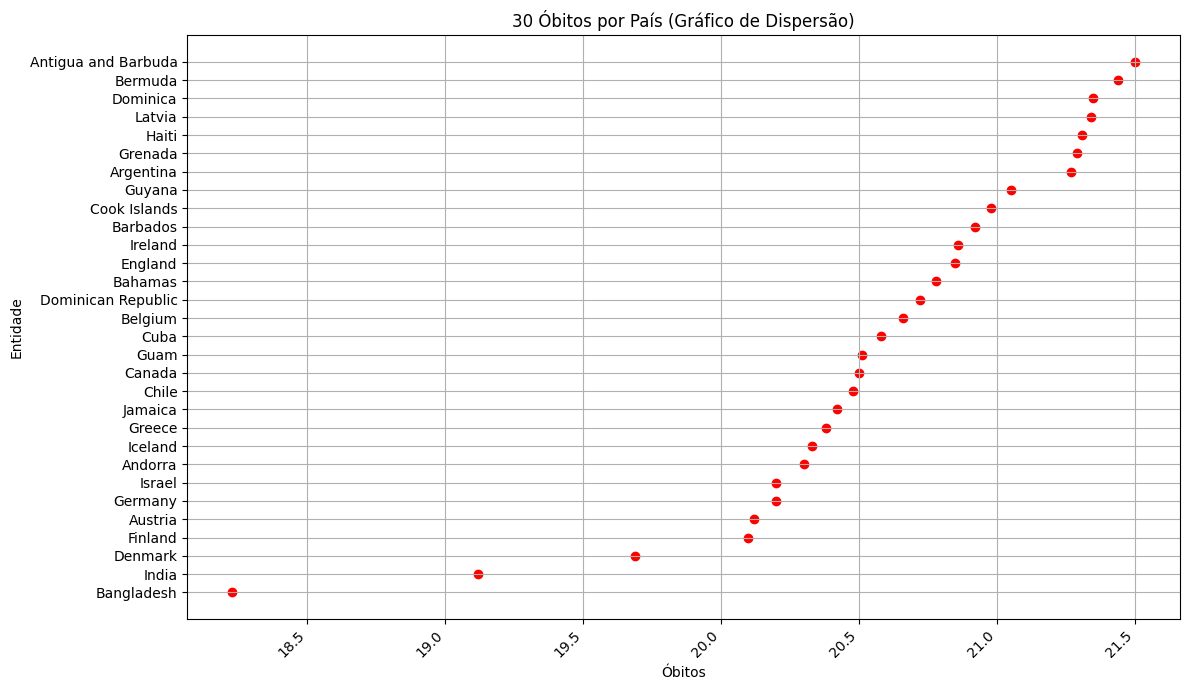

In [ ]:
# O gráfico apresentado é um gráfico de dispersão que mostra os 30 países com o menor número de óbitos por Alzheimer, com base em dados agrupados.
# Vamos explicar cada linha do código de forma simples:
# Agrupa o conjunto de dados (dataset) pela coluna 'Entidade' (representa países ou regiões), depois calcula a soma dos óbitos em cada grupo (país) e
# reseta o índice para que 'Entidade' volte a ser uma coluna regular no DataFrame resultante.
entidade_obitos = dataset.groupby('Entidade')['Óbitos'].sum().reset_index()

# Ordenar os dados pelo número de óbitos em ordem crescente
entidade_obitos = entidade_obitos.sort_values(by='Óbitos', ascending=True)

# Selecionar os 30 menores valores
top_10_entidade = entidade_obitos.head(30)

# Plotando o gráfico de dispersão para 'Entidade'
# Cria uma nova figura para o gráfico com tamanho especificado de 12 x 7 polegadas.
plt.figure(figsize=(12, 7))
# Cria um gráfico de dispersão com os óbitos no eixo x e as entidades (países) no eixo y. A cor dos pontos é definida como vermelha ('r').
plt.scatter(top_10_entidade['Óbitos'], top_10_entidade['Entidade'], color='r')
# Define um título
plt.title('30 Óbitos por País (Gráfico de Dispersão)')
# Rotulo do eixo x
plt.xlabel('Óbitos')
# Rotulo do eixo y
plt.ylabel('Entidade')
# Rotaciona os rótulos do eixo x em 45 graus para melhor legibilidade e alinha à direita ('right').
plt.xticks(rotation=45, ha='right')
# Adiciona uma grade ao gráfico para facilitar a visualização dos pontos.
plt.grid(True)
# Ajusta automaticamente o layout do gráfico para evitar sobreposições e garantir que todos os elementos sejam exibidos corretamente.
plt.tight_layout()
# Exibe o gráfico na tela.
plt.show()

Text(0.5, 1.0, 'Gráfico de registro de óbitos entre 20 e 30 ')

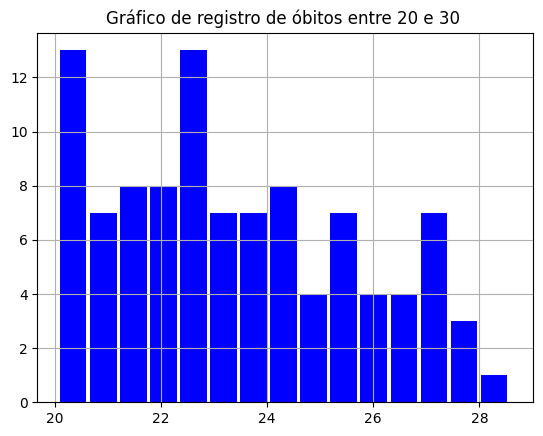

In [ ]:
dataset[(dataset['Óbitos'] >= 20) & (dataset['Óbitos'] <= 30)] ['Óbitos'].hist(bins=15, color='blue',width=0.5)
plt.title('Gráfico de registro de óbitos entre 20 e 30 ')

# # filtra o conjunto de dados para incluir apenas as linhas onde o número de mortes ('Óbitos') está entre 20 e 30
# # Seleciona-se a coluna [Óbitos] dos dados filtrados. Os dados resultantes são uma série contendo apenas as contagens de óbitos dentro do intervalo especificado.
# # hist(bins=15): Este método cria um histograma com 15 compartimentos.
# # color='blue': Define a cor das barras para azul.
# # width=0.5: Define a largura das barras como 0,5.
# dataset[(dataset['Óbitos'] >= 20) & (dataset['Óbitos'] <= 30)] ['Óbitos'].hist(bins=15, color='blue',width=0.5)

# #Define um título.
# plt.title('15 Maiores números de Óbitos')

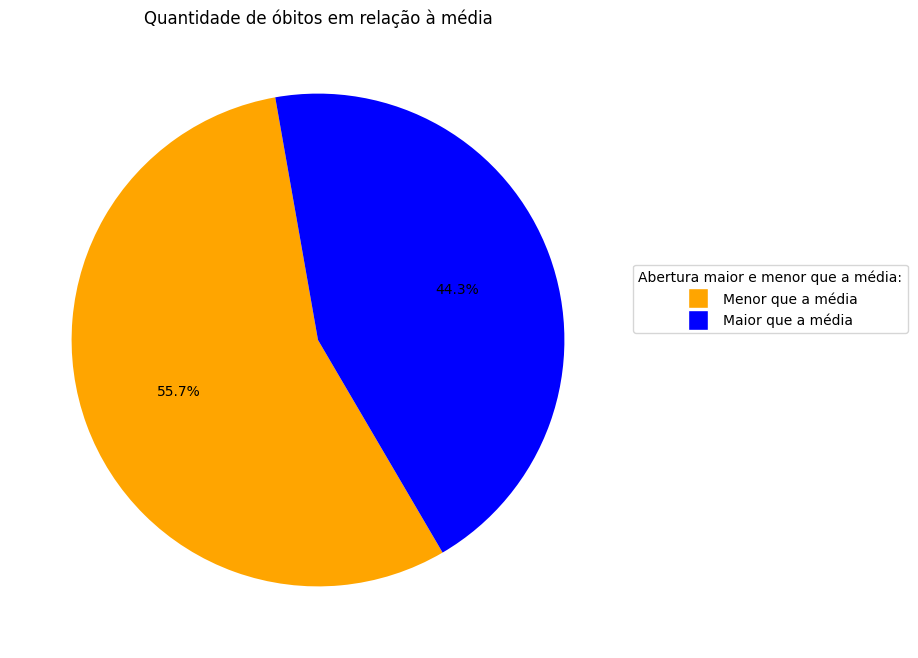

In [ ]:
# O gráfico apresentado é um gráfico de pizza que calcula e mostra os óbitos menores e maiores que a média óbitos por Alzheimer:
# Vamos explicar cada linha do código de forma simples:
# Calcula a quantidade de óbitos menores e maiores que a média (23.03).
óbitos_menores = dataset[dataset['Óbitos'] < 23.475566037735852]['Óbitos'].count()
óbitos_maiores = dataset[dataset['Óbitos'] >= 23.475566037735852]['Óbitos'].count()

# Defini as cores (Larnja e Azul)
cores = ['orange', 'blue']

# Configura a figura e plota o gráfico de pizza com as porcentagens
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie([óbitos_menores, óbitos_maiores], colors=cores, autopct='%1.1f%%', startangle=100)

# Adiciona uma legenda ao gráfico e os quadrados de com cores
legend_labels = ['Menor que a média', 'Maior que a média']
legend_patches = [plt.Line2D([0], [0], marker='s', color='w', markersize=15, markerfacecolor=cor) for cor in cores]
ax.legend(legend_patches, legend_labels, title="Abertura maior e menor que a média:", loc="lower left", bbox_to_anchor=(1, 0.5), ncol=1)

# Define o título e mostra o gráfico de pizza.
plt.title('Quantidade de óbitos em relação à média')
plt.show()

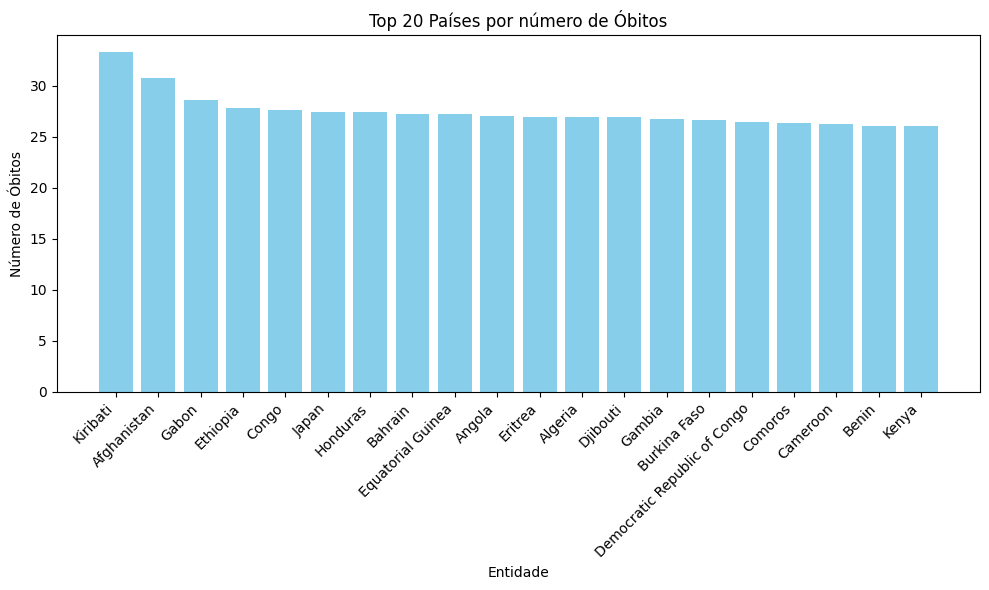

In [ ]:
# Agrupa o dataset pela coluna 'Entidade'
# Calcula a soma dos óbitos para cada entidade.
# Reseta o índice para transformar o resultado em um DataFrame.
entidades_obitos = dataset.groupby('Entidade')['Óbitos'].sum().reset_index()

# sort_values(by='Óbitos', ascending=False) - Ordena o DataFrame resultante pela coluna 'Óbitos' em ordem decrescente.
entidades_obitos = entidades_obitos.sort_values(by='Óbitos', ascending=False)

# Selecionar as 20 primeiras entidades
top_20_entidades = entidades_obitos.head(20)

# Cria uma nova figura para o gráfico com tamanho 10x6 polegadas.
plt.figure(figsize=(10, 6))
# Plota um gráfico de barras com as entidades no eixo X e o número de óbitos no eixo Y, e define a cor das barras como azul claro.
plt.bar(top_20_entidades['Entidade'], top_20_entidades['Óbitos'], color='skyblue')
# Define um título.
plt.title('Top 20 Países por número de Óbitos')
# Adiciona o rótulo ao eixo X.
plt.xlabel('Entidade')
# Adiciona o rótulo ao eixo Y.
plt.ylabel('Número de Óbitos')
# Rotaciona os rótulos do eixo x em 45 graus para a direita para melhor legibilidade.
plt.xticks(rotation=45, ha='right')
# Ajusta automaticamente o espaçamento das subtramas para que o gráfico se ajuste bem dentro da figura.
plt.tight_layout()
# Exibe o gráfico na tela.
plt.show()